## NAME: VIJAY KRISHNA A B
## POSITION: DATASCIENCE INTERN

### TITLE: HAND-WRITTEN EQUATION SOLVER USING CNN
### LEVEL: ADVANCED

### IMPORT NECESSARY PACKAGES FOR DATA PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import seaborn as sns

### PREPROCESS DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/data/maths_symbols.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = data["label"]
X = data.drop(labels = ['label'], axis=1)
X[:10]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
del data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


11    22164
12    21387
1      4684
7      4401
3      4351
9      4188
2      4177
6      4137
0      4132
4      4072
8      4063
5      3795
13       80
10       78
Name: label, dtype: int64

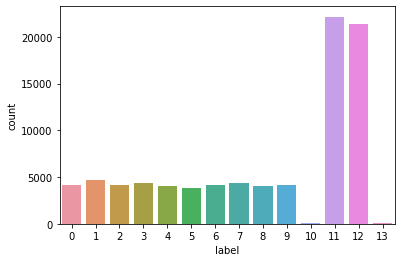

In [ ]:
g = sns.countplot(y)
y.value_counts()

In [ ]:
X = X / 255
X = X.values.reshape(-1, 28, 28, 1)
X.shape

(85709, 28, 28, 1)

In [ ]:
y = to_categorical(y, num_classes = 14)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2, stratify=y)

### IMPORT MODULES NECESSARY FOR BUILDING MODELS

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### INITIALIZE A SEQUENTIAL MODEL

In [ ]:
model = Sequential()

### PHASE 1 LAYERS

In [ ]:
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

### PHASE 2 LAYERS

In [ ]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

### PHASE 3 LAYERS (FINAL)

In [ ]:
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(14, activation = "softmax"))

### CREATE A RMSPROP OPTIMIZER COMPILE THE MODEL

In [ ]:
optimizer = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

In [ ]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy",
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.0001)

### CREATE IMAGE DATA GENERATOR FOR IMAGE AUGMENTATION AND FIT THE TRAINING DATA

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

In [ ]:
datagen.fit(X_train)

### FIT THE MODEL WITH THE IMAGE DATA GENERATOR

In [ ]:
epochs = 10
batch_size = 86


history = model.fit_generator(
                                datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs,
                                validation_data = (X_test,y_test),
                                verbose = 1,
                                steps_per_epoch=X_train.shape[0] // batch_size,
                                callbacks=[learning_rate_reduction]                            
                              )

Epoch 1/10
  1/896 [..............................] - ETA: 51s - loss: 0.0663 - accuracy: 0.9884

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


896/896 [==============================] - 37s 41ms/step - loss: 0.0591 - accuracy: 0.9830 - val_loss: 0.0312 - val_accuracy: 0.9921
Epoch 2/10
896/896 [==============================] - 38s 42ms/step - loss: 0.0549 - accuracy: 0.9846 - val_loss: 0.0398 - val_accuracy: 0.9879
Epoch 3/10
896/896 [==============================] - 37s 41ms/step - loss: 0.0553 - accuracy: 0.9849 - val_loss: 0.0249 - val_accuracy: 0.9931
Epoch 4/10
896/896 [==============================] - 37s 41ms/step - loss: 0.0557 - accuracy: 0.9842 - val_loss: 0.0256 - val_accuracy: 0.9921
Epoch 5/10
896/896 [==============================] - 37s 41ms/step - loss: 0.0580 - accuracy: 0.9843 - val_loss: 0.0315 - val_accuracy: 0.9917
Epoch 6/10
896/896 [==============================] - 38s 42ms/step - loss: 0.0595 - accuracy: 0.9841 - val_loss: 0.0388 - val_accuracy: 0.9904

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/10
896/896 [==============================] - 37s 41ms/ste

### SAVE THE MODEL FOR PREDICTION

In [ ]:
model.save("equation_solver.h5")

In [9]:
from keras.models import load_model

model = load_model('equation_solver.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

### PREPROCESS THE INPUT IMAGE FOR PREDICTION

In [ ]:
from PIL import Image
from itertools import groupby

def process_image(img_name):
    image = Image.open(img_name).convert("L")

    w = image.size[0]
    h = image.size[1]

    # calculate aspect ratio
    r = w/h

    new_w = int(r * 28)
    new_h = 28
    new_image = image.resize((new_w, new_h))

    new_image_arr = np.array(new_image)

    # invert the image
    new_inv_image_arr = 255 - new_image_arr

    # scale the image
    final_image_arr = new_inv_image_arr / 255


    m = final_image_arr.any(0)

    # group individual elements from the image
    out = [final_image_arr[:,[*g]] for k, g in groupby(np.arange(len(m)), lambda x: m[x] != 0) if k]

    num_of_elements = len(out)
    elements_list = []
    for x in range(0, num_of_elements):
        img = out[x]
        
        #adding 0 value columns as fillers to regulate the size of each element
        width = img.shape[1]
        filler = (final_image_arr.shape[0] - width) / 2
        
        if filler.is_integer() == False:    #odd number of filler columns
            filler_l = int(filler)
            filler_r = int(filler) + 1
        else:                               #even number of filler columns
            filler_l = int(filler)
            filler_r = int(filler)
        
        arr_l = np.zeros((final_image_arr.shape[0], filler_l)) #left fillers
        arr_r = np.zeros((final_image_arr.shape[0], filler_r)) #right fillers
        
        #concatinating the left and right fillers
        help_ = np.concatenate((arr_l, img), axis= 1)
        element_arr = np.concatenate((help_, arr_r), axis= 1)
        
        element_arr.resize(28, 28, 1) #resize array 2d to 3d
        #storing all elements in a list
        elements_list.append(element_arr)

    elements_array = np.array(elements_list)

    elements_array = elements_array.reshape(-1, 28, 28, 1)

    elements_pred =  model.predict(elements_array)
    elements_pred = np.argmax(elements_pred, axis = 1)

    preds = list(elements_pred)

    for i in range(len(preds)):
      if preds[i] == 10:
        preds[i] = "/"
      elif preds[i] == 11:
        preds[i] = "+"
      elif preds[i] == 12:
        preds[i] = "-"
      elif preds[i] == 13:
        preds[i] = "*"
      else:
        preds[i] = str(preds[i])

    s = ''.join(preds)
    return s


# Code for expression evalution
def precedence(op):
    if op == '+' or op == '-':
        return 1
    if op == '*' or op == '/':
        return 2
    return 0

def applyOp(a, b, op): 
    if op == '+': return a + b
    if op == '-': return a - b
    if op == '*': return a * b
    if op == '/': return a / b

def evaluate(exp):
    values = []
    ops = []
    i = 0
     
    while i < len(exp):
         
         
        if exp[i].isdigit():
            val = 0
            while (i < len(exp) and exp[i].isdigit()):
                val = (val * 10) + int(exp[i])
                i += 1
             
            values.append(val) 
            i-=1
         
        else:
            while (len(ops) != 0 and precedence(ops[-1]) >= precedence(exp[i])):
                val2 = values.pop()
                val1 = values.pop()
                op = ops.pop()
                 
                values.append(applyOp(val1, val2, op))
             
            ops.append(exp[i])
         
        i += 1
    while len(ops) != 0:
         
        val2 = values.pop()
        val1 = values.pop()
        op = ops.pop()
                 
        values.append(applyOp(val1, val2, op))
    return values[-1]

### PREDICT WITH A CUSTOM IMAGE

In [ ]:
predicted_exp = process_image('test.jpg')
evaluated_val = evaluate(predicted_exp)

print("predicted expression: ", predicted_exp)
print("Value of expression: %.5f" % evaluated_val)

predicted expression:  98/76*54+32-10
Value of expression: 91.63158
